In [1]:
import requests
import numpy as np
import os
import glob
import urllib.request
import pandas as pd
import csv
import io
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

WEB SCRAPPING NCDC COVID19 CASES

In [2]:
url='https://covid19.ncdc.gov.ng/'

In [3]:
headers={ 'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.81 Safari/537.36 Edg/104.0.1293.54"
    
}

In [7]:
raw_ncdc_page=requests.get(url,{'headers':headers})

In [8]:
ncdc_page = BeautifulSoup(raw_ncdc_page.text, 'html.parser')

In [9]:
tb_confirmedcases=ncdc_page.find_all('div', {'class': "table-responsive"})[0].find('table')

print(pd.read_html(str(thetable))[0].to_csv(index=False, header=True))

In [10]:
csv_from_html = pd.read_html(str(tb_confirmedcases))[0].to_csv(index=False, header=True)

In [11]:
ncdc_data=pd.read_csv(io.StringIO(csv_from_html))

In [12]:
ncdc_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,103463,320,102372,771
1,FCT,29258,164,28845,249
2,Rivers,17831,173,17503,155
3,Kaduna,11541,37,11415,89
4,Oyo,10329,2,10125,202
5,Plateau,10317,10,10232,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5664,382,5170,112
9,Kano,5263,112,5024,127


In [13]:
ncdc_data.to_csv('Covid19 Nigeria Cases', index=False)

In [14]:
df_ncdc_data=pd.read_csv('Covid19 Nigeria Cases')

GLOBAL COVID19 CASES

path="https://github.com/CSSEGISandData/COVID-19/blob/master/archived_data/archived_daily_case_updates/01-21-2020_2200.csv"

John Hopkins Data

path="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

daily_confirmed_cases=pd.read_csv(path)

In [15]:
daily_confirmed_cases=pd.read_csv('Daily_Comfirmed_global_cases')

In [16]:
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [17]:
daily_confirmed_cases[daily_confirmed_cases['Country/Region']=='Nigeria']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
204,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,262912,262912,263090,263090,263322,263322,263407,263407,263407,263526


DAILY RECORVERED CASES FROM GIT REPOSITORY

In [18]:
Daily_Recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [19]:
Daily_Recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/22,8/29/22,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dff1=df1.to_csv('Daily recovered cases', index=False) -- not necessary

In [20]:
Daily_Recovered_cases[Daily_Recovered_cases['Country/Region']=='Nigeria']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/22,8/29/22,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22
189,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DAILY DEATH CASES

In [21]:
Daily_death_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [22]:
Daily_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/22,8/29/22,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7777,7777,7777,7777,7778,7778,7780,7782,7783,7783
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3581,3581,3582,3582,3583,3583,3583,3583,3583,3583
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6879,6879,6879
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5694,5694,5700,5704,5704,5704,5704,5704,5704,5706
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4017,4017,4017


In [23]:
Daily_death_cases[Daily_death_cases['Country/Region']=='Nigeria']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/22,8/29/22,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22
204,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148


EXTERNAL DATA

In [24]:
df_covid_external_cases = pd.DataFrame(pd.read_csv('covid_external.csv'))

In [25]:
df_covidnig_cases=df = pd.DataFrame(pd.read_csv('covidnig.csv'))

In [26]:
df_budget_data= pd.DataFrame(pd.read_csv('Budget data.csv'))

In [27]:
df_RealGDP_csv= pd.DataFrame(pd.read_csv('RealGDP.csv'))

VIEWING DATA

In [28]:
df_covidnig_cases.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [29]:
df_covidnig_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


DATA CLEANING AND PREPARATION

RENAMING COLUMN OF THE SCRAPPED DATA

In [30]:
df_covidnig_cases.set_axis(['A', 'B', 'C', 'D', 'E'], axis=1, inplace=True)

In [31]:
df_covidnig_cases['B']=df_covidnig_cases['B'].str.replace(',','')

In [32]:
df_covidnig_cases['C']=df_covidnig_cases['C'].str.replace(',','')

In [33]:
df_covidnig_cases['D']=df_covidnig_cases['D'].str.replace(',','')

In [34]:
df_covidnig_cases['B'] = df_covidnig_cases['B'].astype(str).astype(int)


In [35]:
df_covidnig_cases['C'] = df_covidnig_cases['C'].astype(str).astype(int)

In [36]:
df_covidnig_cases['D'] = df_covidnig_cases['D'].astype(str).astype(int)

In [37]:
df_covidnig_cases.dtypes

A    object
B     int32
C     int32
D     int32
E     int64
dtype: object

df['object_column'] = df['int_column'].astype(str).astype(int)


ANALYSIS

df[['a','b']].sort_values(by='a',ascending=False).plot(kind='bar',stacked=True)

In [38]:
df_covidnig_cases = df_covidnig_cases.sort_values(by='E', ascending=False)

In [39]:
df_covidnig_cases

,A,B,C,D,E
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


No. of Cases (Lab Confirmed 

[Text(0.5, 0, 'States'), Text(0, 0.5, 'Cases')]

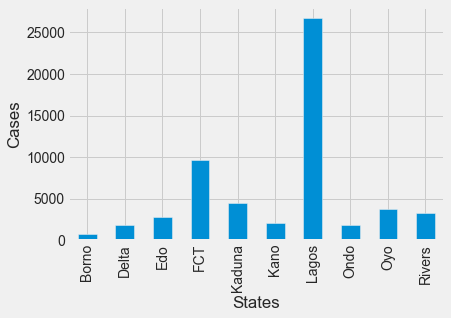

In [40]:
df_covidnig_cases.head(10).groupby(['A'])['B'].mean().plot.bar().set (xlabel="States", ylabel="Cases")

No. of Cases (on admission)

[Text(0.5, 0, 'States'), Text(0, 0.5, 'Cases')]

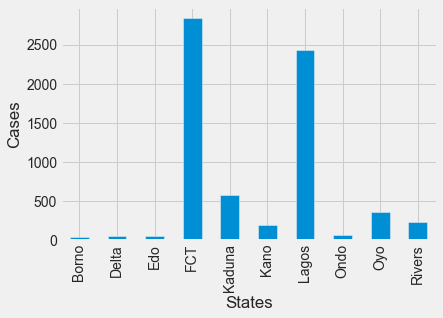

In [41]:
df_covidnig_cases.head(10).groupby(['A'])['C'].mean().plot.bar().set (xlabel="States", ylabel="Cases")

No. Discharged

[Text(0.5, 0, 'States'), Text(0, 0.5, 'Cases')]

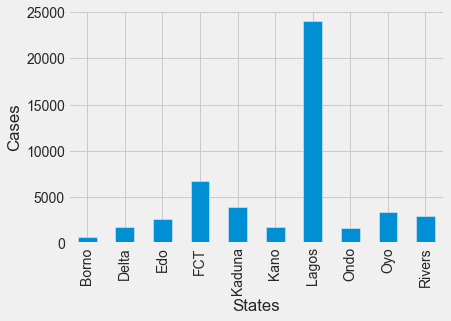

In [42]:
df_covidnig_cases.head(10).groupby(['A'])['D'].mean().plot.bar().set (xlabel="States", ylabel="Cases")


The top 10 states in the LAboratory confirmed cases in Nigeria are Lagos, FCT, Kaduna, Edo, Plateau, Rivers,Oyo, Ogun, Delta and Kano.

No. of Cases (Lab Confirmed)	No. of Cases (on admission)	No. Discharged	No. of Deaths

<AxesSubplot:xlabel='D', ylabel='B'>

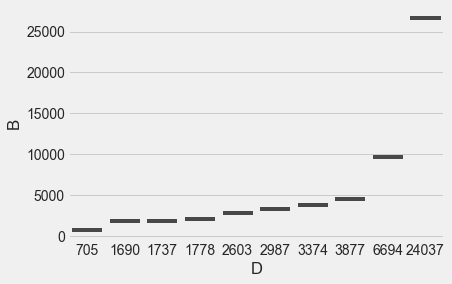

In [43]:
sns.boxplot(x='D', y='B', data=df_covidnig_cases.head(10))

[Text(0.5, 0, 'States'), Text(0, 0.5, 'Cases')]

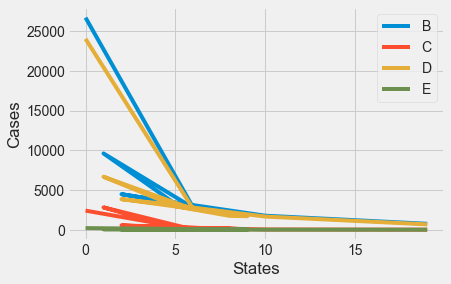

In [44]:
df_covidnig_cases.head(10).plot().set (xlabel="States", ylabel="Cases")

In [45]:
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [46]:
daily_confirmed_cases.max()

Country/Region    Zimbabwe
Lat                71.7069
Long               178.065
1/22/20                444
1/23/20                444
                    ...   
8/26/22           94176471
8/27/22           94189557
8/28/22           94196390
8/29/22           94285683
8/30/22           94379514
Length: 955, dtype: object

In [47]:
Indexmodified = daily_confirmed_cases

In [48]:
Indexmodified

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [49]:
Indexmodified.drop("Lat",  axis=1, inplace=True)

In [50]:
Indexmodified.drop("Long",  axis=1, inplace=True)

In [51]:
Indexmodified

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,0,0,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,0,0,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,0,0,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [52]:
Indexmodified.drop("Province/State",  axis=1, inplace=True)

In [53]:
Indexmodified.drop(Indexmodified.iloc[:, 1:938], inplace=True, axis=1)

Indexmodified.set_index('Country/Region')

Indexmodified.dtypes

In [54]:
Indexmodified.drop("Country/Region",  axis=1, inplace=True)

In [55]:
Ind=Indexmodified.diff(periods=1,axis=0)

In [56]:
Ind

,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133360.0,133572.0,133819.0,134987.0,135301.0,135434.0,135141.0,135540.0,135647.0,135640.0,135994.0,136332.0,136052.0,135665.0,136013.0
2,-53456.0,-53809.0,-54273.0,-55591.0,-56005.0,-56272.0,-56287.0,-56816.0,-57189.0,-57510.0,-57816.0,-58124.0,-58321.0,-58336.0,-58745.0
3,-223482.0,-223498.0,-223581.0,-223675.0,-223756.0,-223830.0,-223919.0,-223996.0,-224016.0,-224070.0,-224118.0,-224148.0,-224167.0,-224208.0,-224245.0
4,56737.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56609.0,56609.0,56609.0,56609.0,56609.0,56609.0,56609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,-10673015.0,-10675829.0,-10679124.0,-10682107.0,-10684811.0,-10686372.0,-10687632.0,-10690884.0,-10694475.0,-10697821.0,-10701016.0,-10703213.0,-10704918.0,-10707327.0,-10707213.0
281,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-701204.0
282,11368.0,11368.0,11379.0,11380.0,11380.0,11380.0,11380.0,11382.0,11384.0,11387.0,11387.0,11390.0,11390.0,11390.0,11391.0
283,320111.0,320361.0,320350.0,320349.0,320349.0,320349.0,320612.0,320610.0,320729.0,320788.0,320788.0,320785.0,320785.0,320897.0,320896.0


In [57]:
Ind.drop(Ind.loc[0:273].index, inplace=True)

In [58]:
Ind

,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
274,23414475.0,23454436.0,23454436.0,23454436.0,23454436.0,23454436.0,23454436.0,23454428.0,23454428.0,23486516.0,23486516.0,23486516.0,23486516.0,23486516.0,23486516.0
275,-22445562.0,-22485523.0,-22485523.0,-22485523.0,-22485523.0,-22485523.0,-22483482.0,-22483482.0,-22483482.0,-22515570.0,-22515570.0,-22515570.0,-22515570.0,-22513715.0,-22513715.0
276,-731678.0,-731659.0,-731641.0,-731626.0,-731610.0,-731598.0,-733628.0,-733614.0,-733595.0,-733577.0,-733562.0,-733562.0,-733562.0,-735417.0,-735376.0
277,-231833.0,-231852.0,-231870.0,-231868.0,-231884.0,-231896.0,-231907.0,-231921.0,-231933.0,-231951.0,-231959.0,-231959.0,-231959.0,-231950.0,-231991.0
278,528928.0,529043.0,529043.0,529207.0,529552.0,529635.0,529830.0,529938.0,529931.0,530030.0,530255.0,530415.0,530468.0,530488.0,530488.0
279,10829781.0,10832480.0,10835775.0,10838577.0,10840936.0,10842414.0,10844416.0,10847560.0,10851151.0,10854398.0,10857361.0,10859398.0,10861050.0,10863430.0,10866671.0
280,-10673015.0,-10675829.0,-10679124.0,-10682107.0,-10684811.0,-10686372.0,-10687632.0,-10690884.0,-10694475.0,-10697821.0,-10701016.0,-10703213.0,-10704918.0,-10707327.0,-10707213.0
281,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-701204.0
282,11368.0,11368.0,11379.0,11380.0,11380.0,11380.0,11380.0,11382.0,11384.0,11387.0,11387.0,11390.0,11390.0,11390.0,11391.0
283,320111.0,320361.0,320350.0,320349.0,320349.0,320349.0,320612.0,320610.0,320729.0,320788.0,320788.0,320785.0,320785.0,320897.0,320896.0


Ind.transpose().plot(figsize=(14,8),)

y = confimed_data['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confimed_data)

Text(0, 0.5, 'Ind')

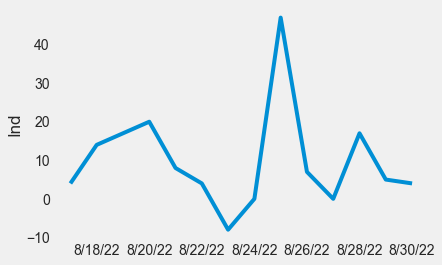

In [59]:
ax = Ind.sum(axis='rows').diff(periods=1).plot(grid=False)
ax.set_ylabel('Ind')

Text(0, 0.5, 'Ind')

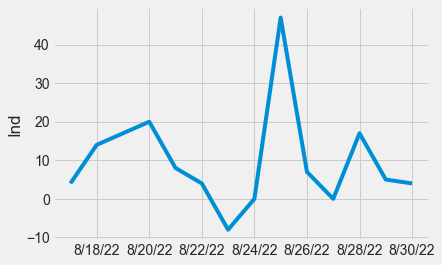

In [60]:
ax = Ind.sum(axis='rows').diff(periods=1).plot(grid=True)
ax.set_ylabel('Ind')

In [61]:
Ind.max().max()

23486516.0

In [62]:
Dailymaxcase=Ind.max()

In [63]:
Dailymaxcase= pd.DataFrame(Dailymaxcase).reset_index()
Dailymaxcase.columns = ['Date', 'Values']


In [64]:
Dailymaxcase

,Date,Values
0,8/16/22,23414475.0
1,8/17/22,23454436.0
2,8/18/22,23454436.0
3,8/19/22,23454436.0
4,8/20/22,23454436.0
5,8/21/22,23454436.0
6,8/22/22,23454436.0
7,8/23/22,23454428.0
8,8/24/22,23454428.0
9,8/25/22,23486516.0


In [97]:
Dailymaxcase.max().Values

23486516.0

In [95]:
Dailymaxcase.max().Date

'8/30/22'

In [72]:
df_covid_external_cases.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [73]:
ncdc_data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,103463,320,102372,771
1,FCT,29258,164,28845,249
2,Rivers,17831,173,17503,155
3,Kaduna,11541,37,11415,89
4,Oyo,10329,2,10125,202


In [74]:
ncd1=ncdc_data

In [75]:
ncd2=df_covid_external_cases

In [76]:
ncd1.set_axis(['states','No. of Cases (Lab Confirmed)','No. of Cases (on admission)','No. Discharged','No. of Deaths'], axis=1, inplace=True)

In [77]:
ncd1

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,103463,320,102372,771
1,FCT,29258,164,28845,249
2,Rivers,17831,173,17503,155
3,Kaduna,11541,37,11415,89
4,Oyo,10329,2,10125,202
5,Plateau,10317,10,10232,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5664,382,5170,112
9,Kano,5263,112,5024,127


In [78]:
Combined_ext_ncdc=pd.merge(ncd1,ncd2, on='states')

In [79]:
Combined_ext_ncdc

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,103463,320,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29258,164,28845,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17831,173,17503,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11541,37,11415,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10329,2,10125,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10317,10,10232,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7821,102,7398,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5664,382,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Kano,5263,112,5024,127,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


In [80]:
Top10comb_conf_vindex=Combined_ext_ncdc.nlargest(10, ['No. of Cases (Lab Confirmed)', 'Overall CCVI Index'])

y=('No. of Cases (Lab Confirmed', 'Overall CCVI Index')
sns.lineplot(x="states", y=y, data=Top10comb_conf_vindex) 

df_covidnig_cases = df_covidnig_cases.sort_values(by='E', ascending=False)

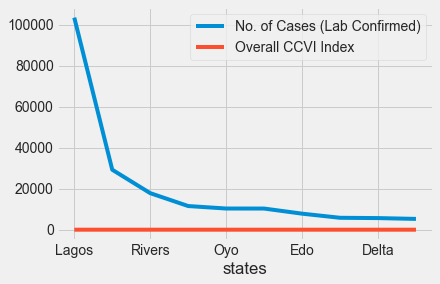

In [81]:
Top10comb_conf_vindex.plot(x="states", y=["No. of Cases (Lab Confirmed)", "Overall CCVI Index"])
plt.show()

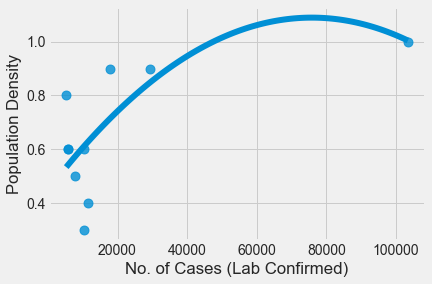

In [82]:
reg_Top10comb_conf_vindex= sns.regplot(x="No. of Cases (Lab Confirmed)", y="Population Density", data=Top10comb_conf_vindex,
                 scatter_kws={"s": 80},
                 order=2, ci=None)

[Text(0.5, 0, 'states'), Text(0, 0.5, 'No. of Deaths')]

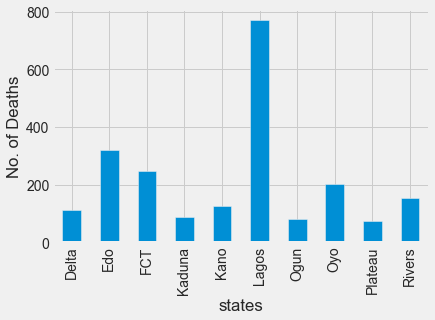

In [99]:
Combined_ext_ncdc.head(10).groupby(['states'])['No. of Deaths'].mean().plot.bar().set (xlabel="states", ylabel="No. of Deaths")

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'No. of Deaths')]

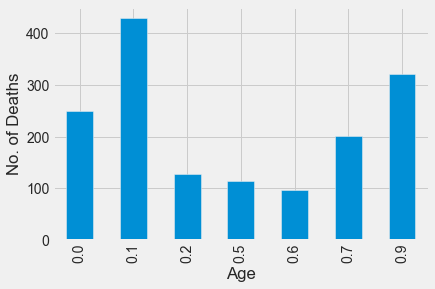

In [84]:
Combined_ext_ncdc.head(10).groupby(['Age'])['No. of Deaths'].mean().plot.bar().set (xlabel="Age", ylabel="No. of Deaths")

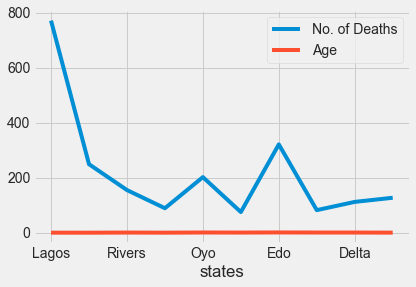

In [85]:
Top10comb_conf_vindex.plot(x="states", y=["No. of Deaths", "Age"])
plt.show()

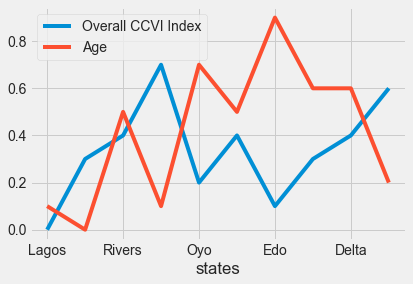

In [86]:
Top10comb_conf_vindex.plot(x="states", y=["Overall CCVI Index", "Age"])
plt.show()

<AxesSubplot:xlabel='Age'>

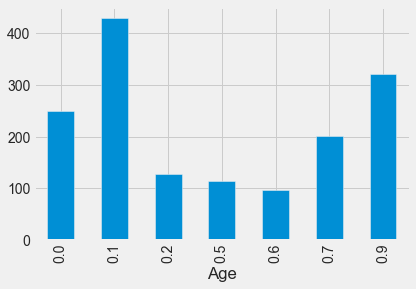

In [87]:
Top10comb_conf_vindex.groupby(['Age'])['No. of Deaths'].mean().plot.bar()

<AxesSubplot:xlabel='Age', ylabel='Density'>

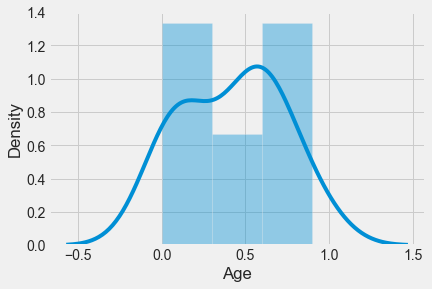

In [88]:
sns.distplot(Top10comb_conf_vindex['Age'])

<AxesSubplot:xlabel='Overall CCVI Index', ylabel='Density'>

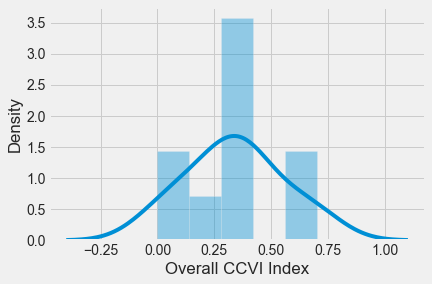

In [89]:
sns.distplot(Top10comb_conf_vindex['Overall CCVI Index'])

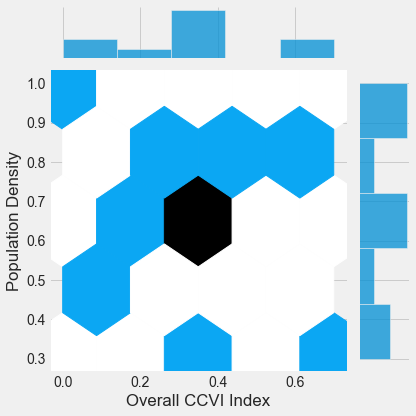

In [90]:
sns.jointplot(x='Overall CCVI Index', y='Population Density', data=Top10comb_conf_vindex, kind='hex')

In  plot above, we have high vulnerability index at 0.4 with a population density of 0.6 and 0.7

In [91]:
GDP=df_RealGDP_csv

In [135]:
GDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


<AxesSubplot:xlabel='Year'>

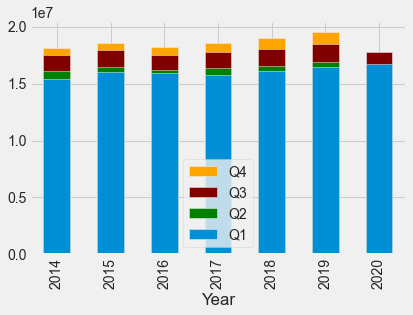

In [150]:
aw = GDP.plot(x="Year", y="Q4",kind="bar",color="Orange")
ay=GDP.plot(x="Year", y="Q3", kind="bar", ax=aw, color="maroon")
az=GDP.plot(x="Year", y="Q2", kind="bar", ax=ay, color="green")
GDP.plot(x="Year", y="Q1", kind="bar", ax=ay )

In [153]:
gdp_value=pd.melt(GDP, id_vars='Year', value_vars=['Q1','Q2','Q3','Q4'])

In [154]:
gdp_value

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


<AxesSubplot:xlabel='Year', ylabel='value'>

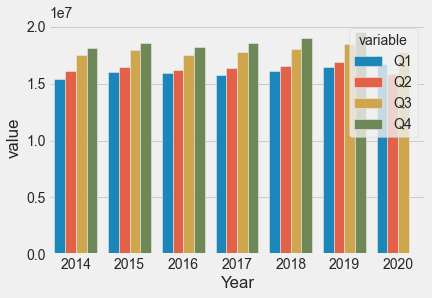

In [157]:
sns.barplot(data=gdp_value, x='Year', y='value', hue='variable')

In [152]:
gdpMelted

,index,variable,value
0,0,Year,2014.00
1,1,Year,2015.00
2,2,Year,2016.00
3,3,Year,2017.00
4,4,Year,2018.00
5,5,Year,2019.00
6,6,Year,2020.00
7,0,Q1,15438679.50
8,1,Q1,16050601.38
9,2,Q1,15943714.54
